In [1]:
# Pre-processing user/movie ratings
# scipy.sparse.csr_matrix
# matrix sparsity = #ratings / total # elements > 0.5

[[ 3  3  2]
 [ 2  3 -2]]
U:  [[ 0.7815437 -0.6238505]
 [ 0.6238505  0.7815437]]
--------

Singular array:  [5.54801894 2.86696457]
--------

V^{T}:  [[ 0.64749817  0.7599438   0.05684667]
 [-0.10759258  0.16501062 -0.9804057 ]
 [-0.75443354  0.62869461  0.18860838]]
--------

S inv:  [[0.18024452 0.         0.        ]
 [0.         0.34880096 0.        ]]
--------

[[ 0.11462451  0.04347826]
 [ 0.07114625  0.13043478]
 [ 0.22134387 -0.26086957]]
--------

(300, 300)
(300, 300)
(300, 451)


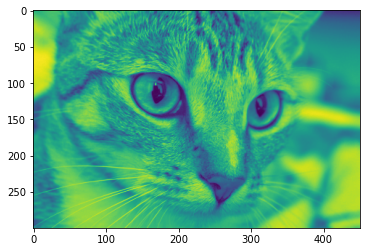

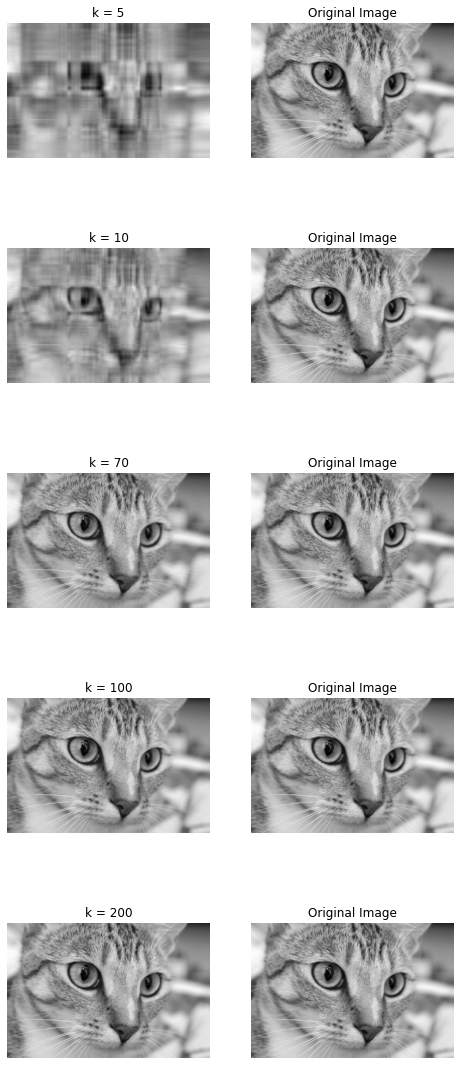

In [26]:
# Testing SVD - singular value decomposition for compressing img
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd

"""
Singular Value Decomp
"""
X = np.array([[3, 3, 2], [2, 3, -2]])
print(X)

# perform SVD
U, singular, V_transpose = svd(X)
print("U: ", U)
print("--------\n")
print("Singular array: ", singular)
print("--------\n")
print("V^{T}: ", V_transpose)
print("--------\n")

"""
Calculate the Pseudo inverse of singular matrix given by:
VW^{-1}U^{T} = M^{-1}

where V is nxn matrix containing orthonormal eigenvectors of A^{T}A
      W is the singular mxn matrix with eigenvalues across diag
      U 
"""
singular_inv = 1.0/singular
s_inv = np.zeros(X.shape)
s_inv[0][0] = singular_inv[0]
s_inv[1][1] = singular_inv[1]
print("S inv: ", s_inv)
print("--------\n")


# calcualte the pseudo inverse
M = np.dot(np.dot(V_transpose.T, s_inv.T), U.T)
print(M)
print("--------\n")


"""
SVD on image compression
"""

cat = data.chelsea()
gray_cat = rgb2gray(cat)
plt.imshow(gray_cat)

# calculate the SVD and plot
U, S, V_T = svd(gray_cat, full_matrices=False)
S = np.diag(S)
print(U.shape)
print(S.shape)
print(V_T.shape)
fig, ax = plt.subplots(5, 2, figsize=(8,20))

curr_fig = 0
for r in [5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(cat_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = "+str(r))
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_cat, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1
plt.show()